In [1]:
# KNN

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

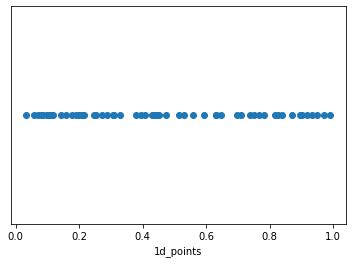

In [5]:
# 차원의 저주 1차원

df_1d = pd.DataFrame(data=np.random.rand(60, 1), columns=['1d_points'])
df_1d["height"] = 1
plt.scatter(df_1d["1d_points"], df_1d["height"])
plt.yticks([])
plt.xlabel(df_1d.columns[0]);

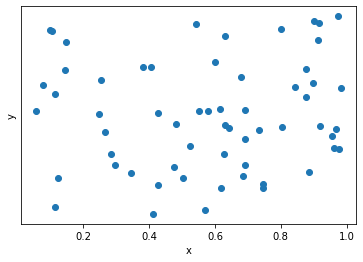

In [6]:
# 차원의 저주 2차원

df_2d = pd.DataFrame(data=np.random.rand(60, 2), columns=['x', 'y'])
plt.scatter(df_2d["x"], df_2d["y"])
plt.yticks([])
plt.xlabel(df_2d.columns[0]);
plt.ylabel(df_2d.columns[1]);

## 차원의 저주

- 차원과 거리는 비례관계
- 차원이 늘어나고 거리가 늘어나면 복잡해짐
- 1차원으로 표현하는 것과 2차원으로 표현하면 거리가 늘어나고 차원이 더 늘어나면 거리가 더 멀어짐
- 차원 증가시 분류기 작동이 어려워짐

# KNN을 이용한 유방암 진단 분류를 위한 데이터 준비

- UCI Machine Learning Repository
- 699개의 관측값, 10개의 입력 특징과 1개의 레이블로 구성
- 16개의 "?" 문자열이 존재하며, 이를 누락 값으로 처리해서 최빈값으로 대체가 필요
- class 특징값으로 양성종양(2), 악성종양(4)을 갖는데 이를 각각 0과 1로 변환해야 함

In [8]:
breast_cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", header=None)
# header 컬럼명인데 컬럼명이 없어 컬럼명을 넣어 줘야 함
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
breast_cancer.columns = ['id_number', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
                         'single_epith_cell_size', 'bare_nuclei', 'bland_chormatin', 'normal_nuceloli', 'mitoses', 'class']
breast_cancer.head()

,id_number,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chormatin,normal_nuceloli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [10]:
# 누락 값의 대체 및 클래스 레이블을 0과 1로 변환
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_number               699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marg_adhesion           699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chormatin         699 non-null    int64 
 8   normal_nuceloli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [11]:
breast_cancer.isnull().values.sum()
# 기본 널 값 찾는 방식

0

In [12]:
# 불필요한 변수 제거 및 표준화 적용
breast_cancer['bare_nuclei'] = breast_cancer['bare_nuclei'].replace('?', np.nan)
breast_cancer['bare_nuclei'] = breast_cancer['bare_nuclei'].fillna(breast_cancer['bare_nuclei'].value_counts().index[0])
# fillna를 이용해 breastcancer의 bare nuclei에 valuecounts 시리즈 함수사용, 값의 빈도수 알려줌,
# 0번인덱스=최빈값, 최빈값을 이용해 ?값을 대체함

In [13]:
breast_cancer['cancer_ind'] = 0
breast_cancer.loc[breast_cancer['class'] ==4, 'cancer_ind'] = 1
# 새로운 컬럼 만들어 0으로 초기화하고 4번 클래스를 1로 바꿔줌, 마스크와, 인덱스를 사용해 변경

In [14]:
# 불필요한 변수 제거 및 표준화 적용
X = breast_cancer.drop(['id_number', 'class', 'cancer_ind'], axis=1)
# X = df 의 특징 행렬을 만듬
y = breast_cancer.cancer_ind
# y = serise

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 훈련용7과 테스트용3으로 분리

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 표준화 작업, StandardScale, 표준화 점수작업해 비교가 가능하도록 만들어줌

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
# 훈련용을 fit_transform
X_test_scaled = scaler.transform(X_test)
# 테스트용은 transform
# scaler만 적용시킴

In [21]:
# 머신러닝 모델 클래스 KNeighborsClassifier를 이용한 학습
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# n_neighbors = k, 너무 낮으면 고분산 모델이 됨
knn.fit(X_train_scaled, y_train)
# fit할때 scaled 자료를 이용함

KNeighborsClassifier(n_neighbors=3)

In [22]:
# 분류모델의 혼동행렬, 정확도, AUC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [23]:
y_pred = knn.predict(X_test_scaled)
# predict 할때도 scaled 된 값을 사용, 비교가능하도록 scaled시킴

In [24]:
accuracy_score(y_test, y_pred)
# 

0.9761904761904762

In [25]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  3,  64]], dtype=int64)

In [26]:
# 그리드 서치를 이용한 하이퍼 파라미터의 최적값 선택
from sklearn.model_selection import GridSearchCV

In [28]:
grid_serch = GridSearchCV(knn, {"n_neighbors": [1,2,3,4,5]}, n_jobs=-1, cv=7, scoring="roc_auc")
                            # 샘플값을 n_neighbors에 줌, 전체데이터로, 7번 겹검사, 

In [29]:
grid_serch.fit(X_train_scaled, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, scoring='roc_auc')

In [30]:
grid_serch.best_params_

{'n_neighbors': 5}

In [31]:
knn_best = grid_serch.best_estimator_

In [32]:
y_pred = knn_best.predict(X_test_scaled)

In [33]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [34]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  5,  62]], dtype=int64)

In [35]:
roc_auc_score(y_test, y_pred)

0.9556935601711722